## Центральная предельная теорема

In [1]:
import math
import numpy as np
from scipy import stats as sts
from scipy.stats import pareto
import matplotlib.pyplot as plt
%matplotlib inline

### Распределение Парето 
#### Функция распределения:
\begin{align}
F(x) & = 1-\frac{1}{x^a} , если  x >= 1\\
F(x) & = 0 , если  x < 1
\end{align}
#### Плотность распределения:
\begin{align}
f(x) & = \frac{a}{x^{a+1}} , если  {x >= 1}\\
f(x) & = 0 , если  x < 1
\end{align}

#### Генерация выборки объемом 1000

In [2]:
b = 2.62
function = pareto(b)
sample = function.rvs(1000)
#Массив точек для плотности
massive = np.linspace(1,10,1000)
#Плотность
density = function.pdf(massive)

#### Гистрограмма выборки и теоретической функции распределения

/home/ubuntu/anaconda3/envs/speech_features/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


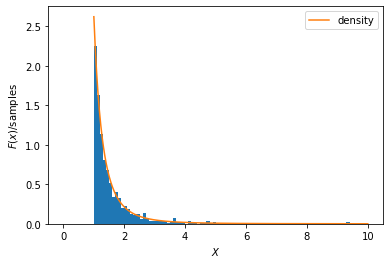

In [3]:
plt.hist(sample, bins=100, range=(0,10), normed=True)
plt.plot(massive, density, label='density')
plt.xlabel('$X$')
plt.ylabel('$F(x)$/samples')
plt.legend(loc='best')

#### Расчет вспомогающих параметров

In [4]:
x_min = 1.0
#Математическое ожидание (среднее)
M = (x_min * b) / (b - 1)
#Дисперсия
D = (M ** 2) * (b / (b - 2))

#### При выборках объема 5, 10, 50, 100, 500

In [6]:
numbers = [5, 10, 50, 100, 500]
sample_means_list = {}
D_new_list = {}
sigma_list = {}
norm_list = {}
density_list = {}

for number in numbers:
    sample_means_list[number] = np.array([])
    index = 1
    while index <= 1000:
        sample_means = function.rvs(number)
        mean = sum(sample_means)/number
        sample_means_list[number] = np.append(sample_means_list[number], mean)
        index += 1
    D_new_list[number] = D / number
    sigma_list[number] = math.sqrt(D_new_list[number])
    norm_list[number] = sts.norm(M, sigma_list[number])
    density_list[number] = norm_list[number].pdf(massive[:500])

#### Гистрограммы выборки и теоретической функции распределения при выборке 5, 10, 50, 100, 500

/home/ubuntu/anaconda3/envs/speech_features/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


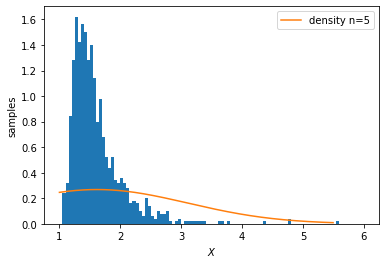

In [18]:
#для выборки 5
number = numbers[0]
plt.hist(sample_means_list[number], bins =100, range=(1,6), normed=True)
plt.plot(massive[:500], density_list[number], label='density n={}'.format(number))
plt.ylabel('samples')
plt.xlabel('$X$')
plt.legend(loc='best')

/home/ubuntu/anaconda3/envs/speech_features/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


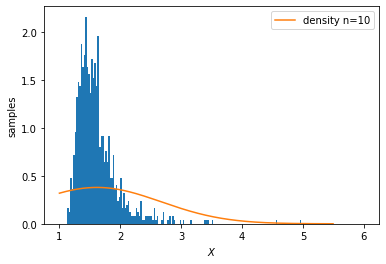

In [19]:
#для выборки 10
number = numbers[1]
plt.hist(sample_means_list[number], bins =200, range=(1,6), normed=True)
plt.plot(massive[:500], density_list[number], label='density n={}'.format(number))
plt.ylabel('samples')
plt.xlabel('$X$')
plt.legend(loc='best')

/home/ubuntu/anaconda3/envs/speech_features/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


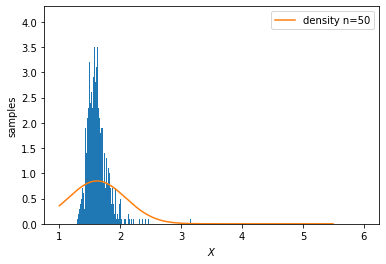

In [9]:
#для выборки 50
number = numbers[2]
plt.hist(sample_means_list[number], bins =500, range=(1,6), normed=True)
plt.plot(massive[:500], density_list[number], label='density n={}'.format(number))
plt.ylabel('samples')
plt.xlabel('$X$')
plt.legend(loc='best')

/home/ubuntu/anaconda3/envs/speech_features/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


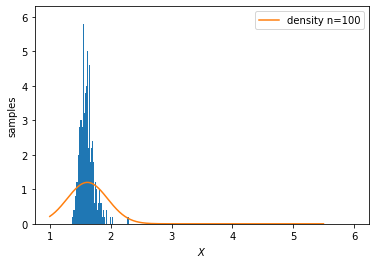

In [10]:
#для выборки 100
number = numbers[3]
plt.hist(sample_means_list[number], bins =1000, range=(1,6), normed=True)
plt.plot(massive[:500], density_list[number], label='density n={}'.format(number))
plt.ylabel('samples')
plt.xlabel('$X$')
plt.legend(loc='best')

/home/ubuntu/anaconda3/envs/speech_features/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


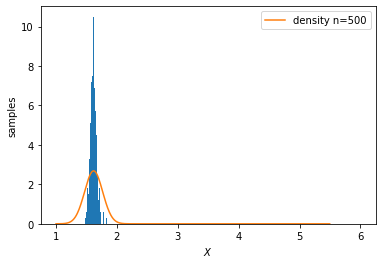

In [11]:
#для выборки 500
number = numbers[4]
plt.hist(sample_means_list[number], bins =1500, range=(1,6), normed=True)
plt.plot(massive[:500], density_list[number], label='density n={}'.format(number))
plt.ylabel('samples')
plt.xlabel('$X$')
plt.legend(loc='best')

#### Параметры

In [14]:
print('Дисперсии: ', D_new_list)
print('Сигмы: ', sigma_list)
print('Нормы: ', norm_list)
#print('Плотности: ', density_list)

Дисперсии:  {5: 2.2106101056585588, 10: 1.1053050528292794, 50: 0.22106101056585586, 100: 0.11053050528292793, 500: 0.022106101056585586}
Сигмы:  {5: 1.4868120613105609, 10: 1.0513348909026463, 50: 0.4701712566351285, 100: 0.3324612838856999, 500: 0.14868120613105607}
Нормы:  {5: <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8d42b6c2e8>, 10: <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8d42b6c860>, 50: <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8d42b6ca58>, 100: <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8d4338cb70>, 500: <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8d42b6c278>}


#### Выводы

Из информации, представленной на данных графиках, описывающих распределение Парето, видно что с увеличением размера выборки функция сходится и увеличивается точность аппроксимации распределения выборочных средних нормальным. Наиболее точную картину плотности мы можем наблюдать при большей выборке, в нашем случае это размер выборки 500.